# Final Project - Bank marketing analysis

## 1. Data loading

### Import libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
from matplotlib import pyplot as plt
plt.style.use('bmh')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv('data/bank-additional-full.csv', sep =';')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape

(41188, 21)

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## 2. Data exploration

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En nuestro dataset no hay valores nulos y se compone de columnas numéricas y categóricas


### Target Variable ('Y')

Has the client subscribed a term deposit?

<AxesSubplot:>

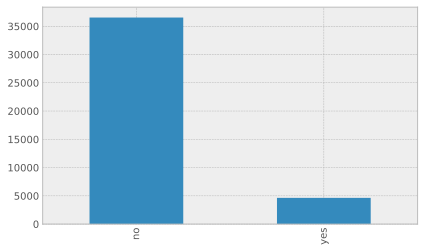

In [54]:
data['y'].value_counts().plot.bar()

In [16]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
data['y'].value_counts()/len(data)

no     0.887346
yes    0.112654
Name: y, dtype: float64

#### Hay mucha más gente que no se ha suscrito al préstamo 
- yes (11,26 %)
- no (88,73 %)

Tenemos un balance descompensado -> más tarde haremos un oversampling para solucionar este problema

In [17]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Visualization

### Analysis by columns

### Bank client data

#### 'Age' (numerical)

<AxesSubplot:>

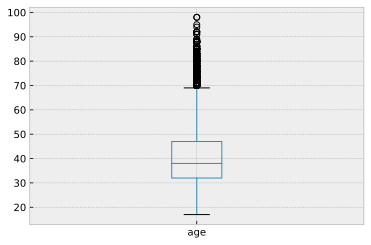

In [3]:
data['age'].plot(kind='box')

La mayoría de clientes está entre los 25 y los 55, media(40 años)

In [8]:
higher_outlier=data['age'].quantile(q = 0.75)+1.5*(data['age'].quantile(q = 0.75)-data['age'].quantile(q = 0.25))
lower_outlier=data['age'].quantile(q = 0.25)-1.5*(data['age'].quantile(q = 0.75)-data['age'].quantile(q = 0.25))
print("higher_outlier={}\nlower_outlier={}".format(higher_outlier,lower_outlier))

higher_outlier=69.5
lower_outlier=9.5


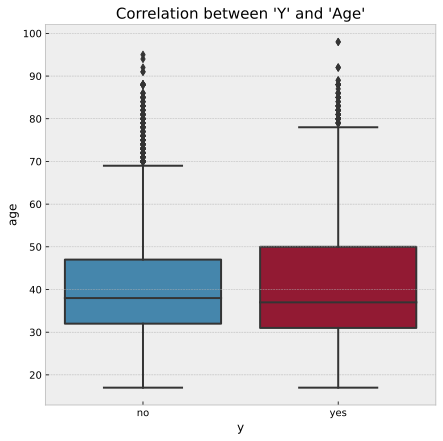

In [5]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='age', data=data)
plt.title("Correlation between 'Y' and 'Age'",fontsize=15)
plt.show()

Dado este gráfico, podemos ver que hay outliers pero el máximo es 98, que es una edad que pertenece a una muestra representativa de la población en general (no es como si tuviésemos un máximo de 150 años, ya que esto es imposible y se trataría de un error)
Por tanto no quitamos outliers para que el modelo sea lo más representativo de la realidad posible


In [41]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [42]:
data['age'].nunique()

78

Vamos a dividirlo en cuatro grupos de edad, en vez de tener 78 valores diferentes

In [4]:
def age(data):
    data.loc[data['age'] <= 32, 'age'] = 1
    data.loc[(data['age'] > 32) & (data['age'] <= 47), 'age'] = 2
    data.loc[(data['age'] > 47) & (data['age'] <= 70), 'age'] = 3
    data.loc[(data['age'] > 70) & (data['age'] <= 98), 'age'] = 4
           
    return data

age(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,3,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### 'Education' (categorical)

In [5]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'Basic', inplace=True)
data.replace('university.degree', 'University degree', inplace=True)
data.replace('high.school', 'High school', inplace=True)
data.replace(['professional.course'], 'Professional course', inplace=True)

In [20]:
pd.crosstab(data.education, data.y)

y,no,yes
education,,
Basic,11424,1089
High school,8484,1031
Professional course,4648,595
University degree,10498,1670
illiterate,14,4
unknown,1480,251


In [21]:
pd.crosstab(data.education, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
education,,
Basic,0.912971,0.087029
High school,0.891645,0.108355
Professional course,0.886515,0.113485
University degree,0.862755,0.137245
illiterate,0.777778,0.222222
unknown,0.854997,0.145003


La gente 'illiterate' es la que tiene mayor proporción de yes VS no
Pero al ser tan pocos, vamos a fijarnos mejor en el dato del resto y vemos la tendencia de que a más estudios, más gente se suscribe al préstamo

<AxesSubplot:xlabel='education'>

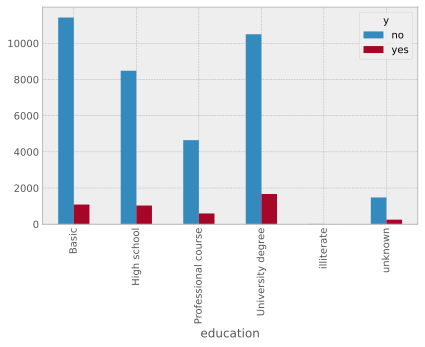

In [58]:
pd.crosstab(data['education'], data['y']).plot(kind = 'bar')

#### 'Marital' (categorical)

In [23]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [24]:
pd.crosstab(data.marital, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


In [50]:
data['marital'].value_counts()/len(data)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

Más de la mitad de los clientes están casados (60 %), pero vemos que los que están solteros se han subscrito al préstamo en mayor proporción que el resto (14 % contratan)

<AxesSubplot:xlabel='marital'>

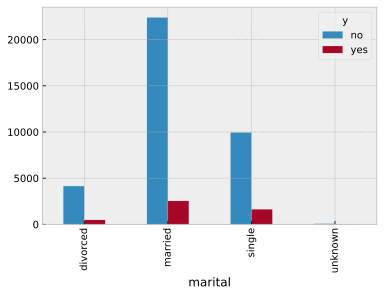

In [6]:
pd.crosstab(data['marital'], data['y']).plot(kind = 'bar')

### 'Default' (categorical)

default: que un cliente tenga una deuda y deje de pagarla, cuando se da un cese de un pago al que está obligado

In [26]:
pd.crosstab(data.default, data.y)

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [27]:
pd.crosstab(data.default, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
default,,
no,0.87121,0.12879
unknown,0.94847,0.05153
yes,1.00000,0.00000


<AxesSubplot:xlabel='default'>

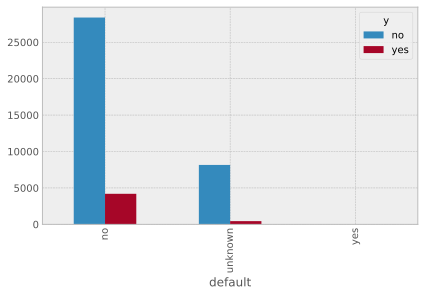

In [59]:
pd.crosstab(data['default'], data['y']).plot(kind = 'bar')

Esta variable no nos aporta información relevante ya que apenas hay gente en situación de default y no se ve un comportamiento similar entre el 'no' y el 'unknown'

In [6]:
data.drop(['default'],axis=1,inplace=True)

### 'Housing' (categorical)

In [9]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing'>

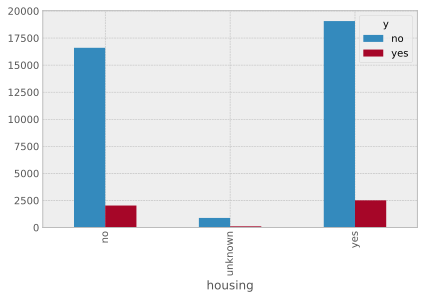

In [64]:
pd.crosstab(data['housing'], data['y']).plot(kind = 'bar')

In [33]:
pd.crosstab(data.housing, data.y)

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


In [65]:
pd.crosstab(data.housing, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
housing,,
no,0.891204,0.108796
unknown,0.891919,0.108081
yes,0.883806,0.116194


No hay casi diferencia en la tendencia de las personas con hipoteca o a la hora de suscribirse a un préstamo

### 'Loan' (categorical)

In [35]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan'>

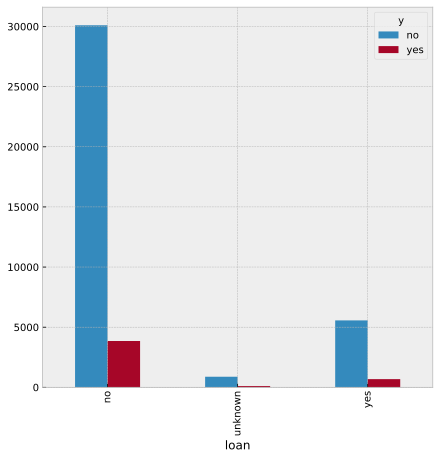

In [10]:
pd.crosstab(data['loan'], data['y']).plot(kind = 'bar')

In [37]:
pd.crosstab(data.loan, data.y)

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


In [38]:
pd.crosstab(data.loan, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
loan,,
no,0.886598,0.113402
unknown,0.891919,0.108081
yes,0.890685,0.109315


La mayoría de los clientes no tiene un préstamos personal (82,42 %)

#### 'Job' (categorical)

In [39]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Para intentar reducir el número de unknowns voy a poner que aquellas personas mayores de 66 años están retiradas (edad legal de jubilación en portugal)

In [7]:
data.loc[(data['age']>66) & (data['job']=='unknown'), 'job'] = 'retired'

In [42]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1728
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            322
Name: job, dtype: int64

In [43]:
pd.crosstab(data.job, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.745370,0.254630
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


Se impacta en mayor medida a personas que trabajan de admin (1352 yes), blue-collar (638) y technician (730) para la promoción de la contratación del préstamo

Es interensate ver que contratan en mayor proporción el préstamo aquellas personas que son estudiantes, retirados, desempleados y admin así que para futuras campañas sería interesante prestarles especial atención 

<AxesSubplot:xlabel='job'>

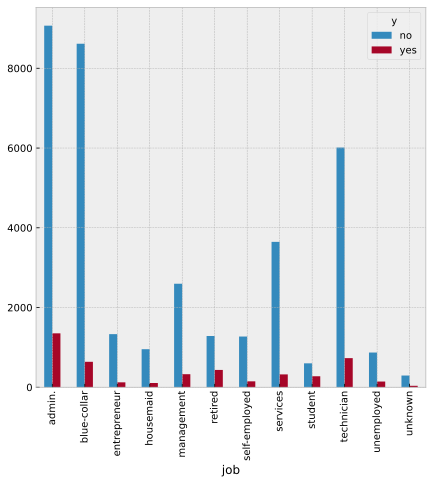

In [10]:
pd.crosstab(data['job'], data['y']).plot(kind = 'bar')

### Related with the last contact of the current campaign

### Contact (categorical)

Tipo de comunicación de contacto: Móvil, Fijo

In [45]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact'>

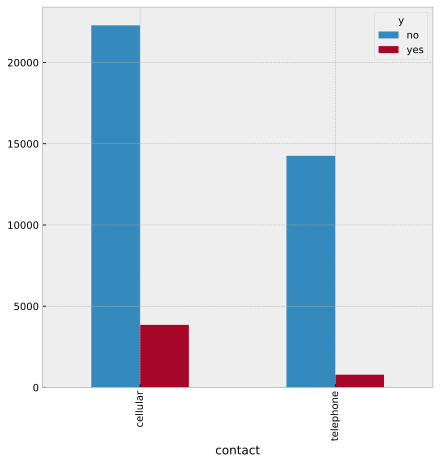

In [12]:
pd.crosstab(data['contact'], data['y']).plot(kind = 'bar')

In [47]:
pd.crosstab(data.contact, data.y)

y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


In [48]:
pd.crosstab(data.contact, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


Se producen más impactos a través de móvil que de teléfono fijo y hay una mayor proporción de personas que se suscriben al préstamo vía móvil así que funciona mejor este tipo de canal

Voy a pasar esta columna categórica a numérica siendo móvil/cellular = 1 y telephone = 0

In [10]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,Basic,no,no,0,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,services,married,High school,no,no,0,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,High school,yes,no,0,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,admin.,married,Basic,no,no,0,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,High school,no,yes,0,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Month (categorical)

In [51]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [52]:
pd.crosstab(data.month, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


<AxesSubplot:xlabel='month'>

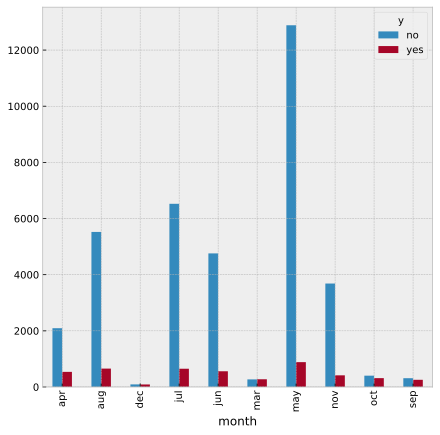

In [14]:
pd.crosstab(data['month'], data['y']).plot(kind = 'bar')

Esta variable muestra el mes en el que se ha hecho el último contacto del año

Es interesante ver que mayo ha sido el mes con mayor captación. Podemos observar el pico de suscriptores y no suscriptores en este mes

A los que se impactó en mayo, junio, julio y agosto (verano) tienen una mayor proporción de no suscritores (90 % aprox), en cambio a los que se impactó en septiembre y octubre mejora el ratio

### Day of the week (categorical)

día de ultimo contacto de la semana

In [54]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='day_of_week'>

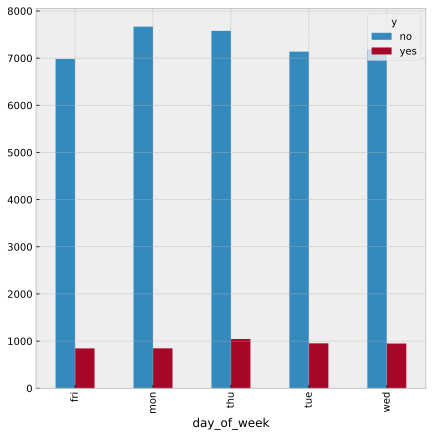

In [15]:
pd.crosstab(data['day_of_week'], data['y']).plot(kind = 'bar')

In [56]:
pd.crosstab(data.day_of_week, data.y)

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [57]:
pd.crosstab(data.day_of_week, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


Como podemos ver no hay mucha diferencia entre los días de la semana 
Los lunes son los días que menos proporción de suscripciones tienen y los jueves los que más

### Duration (numerical)

Como nos pone en la descripción del dataset, este atributo afecta en gran medida al objetivo de salida.

Sin embargo, la duración no se conoce antes de realizar una llamada. 

Además, después de la finalización de la llamada y ya se conoce. 

Por lo tanto, la excluiremos de nuestro modelo de predicción.


In [8]:
data.drop(['duration'],axis=1,inplace=True)

## Other attributes

### 'Campaign' (numerical)

Number of contacts performed during this campaign and for this client (numeric, includes last contact)

<AxesSubplot:>

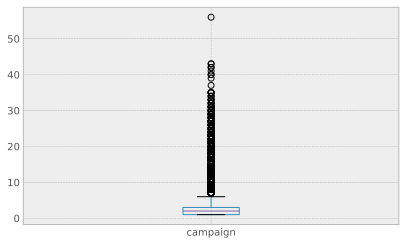

In [76]:
data['campaign'].plot(kind='box')

In [39]:
data.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [9]:
higher_outlier=data['campaign'].quantile(q = 0.75)+1.5*(data['campaign'].quantile(q = 0.75)-data['campaign'].quantile(q = 0.25))
lower_outlier=data['campaign'].quantile(q = 0.25)-1.5*(data['campaign'].quantile(q = 0.75)-data['campaign'].quantile(q = 0.25))
print("higher_outlier={}\nlower_outlier={}".format(higher_outlier,lower_outlier))

higher_outlier=6.0
lower_outlier=-2.0


Al igual que la edad, esta variable tiene muchos outliers pero pueden ser importantes así que no quitaremos filas sino que lo agruparemos por grupos

In [9]:
def campaign(data):
    data.loc[data['campaign'] <= 1, 'campaign'] = 1
    data.loc[(data['campaign'] > 1) & (data['campaign'] <= 2)  , 'campaign']    = 2
    data.loc[(data['campaign'] > 2) & (data['campaign'] <= 3)  , 'campaign']   = 3
    data.loc[(data['campaign'] > 3) & (data['campaign'] <= 6), 'campaign'] = 4
    data.loc[data['campaign']  > 6, 'campaign'] = 5

campaign(data);

In [80]:
pd.crosstab(data.campaign, data.y)


y,no,yes
campaign,,
1,15342,2300
2,9359,1211
3,4767,574
4,4785,444
5,2295,111


In [81]:
pd.crosstab(data.campaign, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
campaign,,
1,0.869629,0.130371
2,0.885430,0.114570
3,0.892529,0.107471
4,0.915089,0.084911
5,0.953865,0.046135


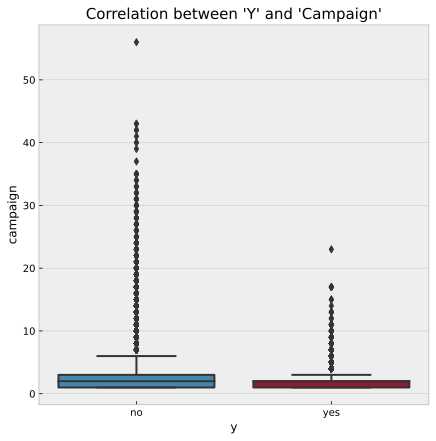

In [12]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='campaign', data=data)
plt.title("Correlation between 'Y' and 'Campaign'",fontsize=15)
plt.show()

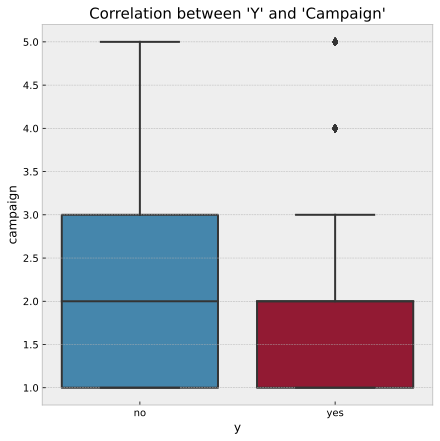

In [14]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='campaign', data=data)
plt.title("Correlation between 'Y' and 'Campaign'",fontsize=15)
plt.show()

### 'Previous' (numerical)

Number of contacts performed before this campaign and for this client (numeric)

<AxesSubplot:>

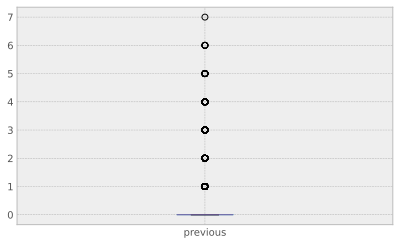

In [82]:
data['previous'].plot(kind='box')

In [8]:
data['previous'].describe()

count    40319.000000
mean         0.176418
std          0.499271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [11]:
higher_outlier=data['previous'].quantile(q = 0.75)+1.5*(data['previous'].quantile(q = 0.75)-data['campaign'].quantile(q = 0.25))
lower_outlier=data['previous'].quantile(q = 0.25)-1.5*(data['previous'].quantile(q = 0.75)-data['campaign'].quantile(q = 0.25))
print("higher_outlier={}\nlower_outlier={}".format(higher_outlier,lower_outlier))

higher_outlier=-1.5
lower_outlier=1.5


In [10]:
def previous(data):
    data.loc[data['previous'] <= 1, 'previous'] = 1
    data.loc[(data['previous'] > 1)   , 'previous'] = 2


previous(data);

In [87]:
pd.crosstab(data.previous, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
previous,,
1,0.897617,0.102383
2,0.500000,0.500000


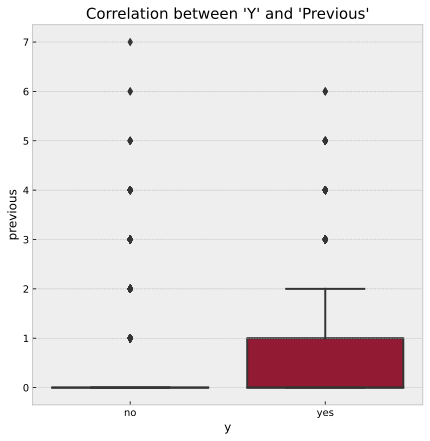

In [5]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='previous', data=data)
plt.title("Correlation between 'Y' and 'Previous'",fontsize=15)
plt.show()

previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)

### 'Pdays' (numerical)

In [63]:
data['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

<AxesSubplot:>

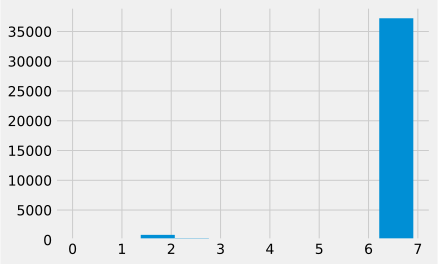

In [16]:
data['pdays'].hist()

In [71]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [16]:
higher_outlier=data['pdays'].quantile(q = 0.75)+1.5*(data['pdays'].quantile(q = 0.75)-data['pdays'].quantile(q = 0.25))
lower_outlier=data['pdays'].quantile(q = 0.25)-1.5*(data['pdays'].quantile(q = 0.75)-data['pdays'].quantile(q = 0.25))
print("higher_outlier={}\nlower_outlier={}".format(higher_outlier,lower_outlier))

higher_outlier=999.0
lower_outlier=999.0


In [11]:
def pdays(data):
    data.loc[data['pdays'] <= 998, 'pdays'] = 1
    data.loc[(data['pdays'] > 998)   , 'pdays'] = 2


pdays(data);

In [74]:
pd.crosstab(data.pdays, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
pdays,,
0,0.333333,0.666667
1,0.692308,0.307692
2,0.393443,0.606557
3,0.321185,0.678815
4,0.466102,0.533898
5,0.369565,0.630435
6,0.298544,0.701456
7,0.333333,0.666667
8,0.333333,0.666667


pdays: número de días transcurridos desde que se contactó por última vez con el cliente en una campaña anterior 
Es una columna numérica
999 significa que el cliente no fue contactado previamente, por lo que en este gráfico vemos que son la mayoría

### Poutcome (categorical)

outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

<AxesSubplot:>

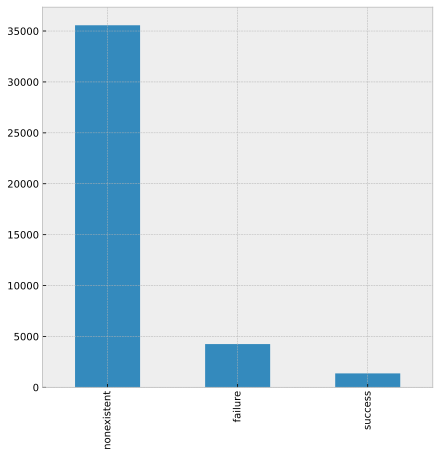

In [33]:
data['poutcome'].value_counts().plot.bar()

In [78]:
pd.crosstab(data.poutcome, data.y).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


In [27]:
pd.crosstab(data.poutcome, data.y)

y,0,1
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [11]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,Basic,no,no,telephone,may,mon,1,2,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,services,married,High school,no,no,telephone,may,mon,1,2,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,High school,yes,no,telephone,may,mon,1,2,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,admin.,married,Basic,no,no,telephone,may,mon,1,2,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,High school,no,yes,telephone,may,mon,1,2,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Social and economic context attributes

### emp.var.rate

In [81]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,High school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,High school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basic,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,High school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [94]:
data['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [83]:
pd.crosstab(data['emp.var.rate'], data.y)

y,no,yes
emp.var.rate,,
-3.4,617,454
-3.0,84,88
-2.9,1069,594
-1.8,7723,1461
-1.7,370,403
-1.1,334,301
-0.2,9,1
-0.1,3451,232
1.1,7523,240


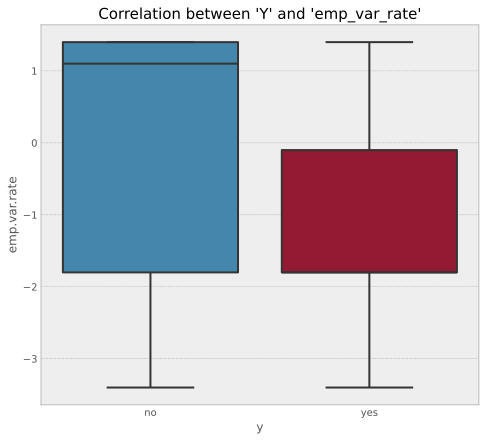

In [93]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='emp.var.rate', data=data)
plt.title("Correlation between 'Y' and 'emp_var_rate'",fontsize=15)
plt.show()

### cons.price.idx

In [95]:
data['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

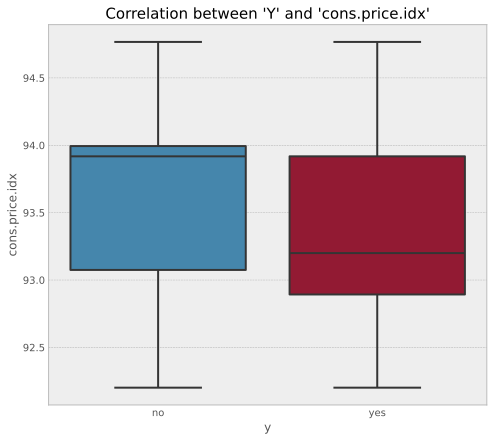

In [96]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='cons.price.idx', data=data)
plt.title("Correlation between 'Y' and 'cons.price.idx'",fontsize=15)
plt.show()

### euribor3m

In [98]:
data['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

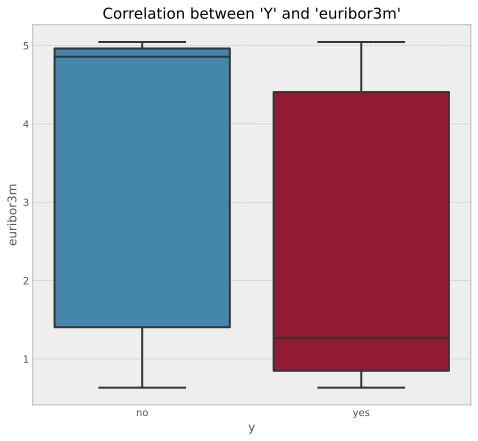

In [99]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='euribor3m', data=data)
plt.title("Correlation between 'Y' and 'euribor3m'",fontsize=15)
plt.show()

### nr.employed

In [100]:
data['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

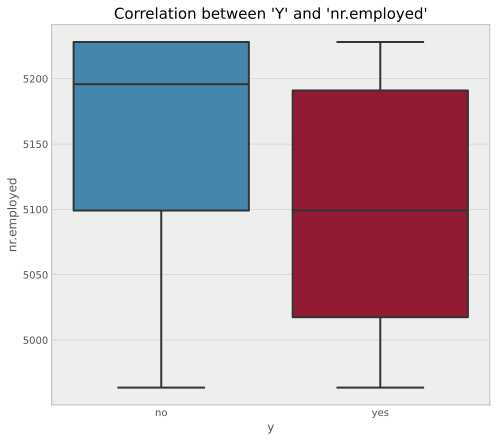

In [101]:
plt.rcParams['figure.figsize'] = 7,7
sns.boxplot(x='y', y='nr.employed', data=data)
plt.title("Correlation between 'Y' and 'nr.employed'",fontsize=15)
plt.show()

## Target Y (categorical)

Has the client subscribed a term deposit?

In [23]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

<AxesSubplot:>

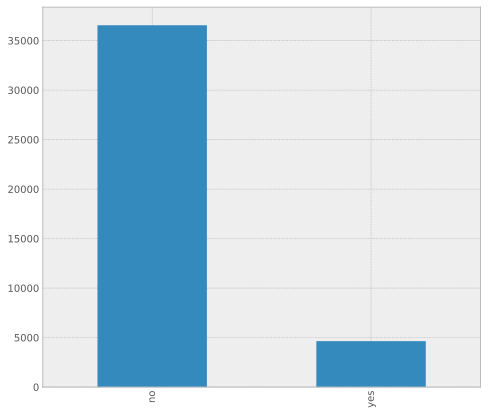

In [102]:
data['y'].value_counts().plot.bar()

In [13]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,High school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,High school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basic,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,High school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  float64
 10  pdays           41188 non-null  float64
 11  previous        41188 non-null  float64
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

### Standarization

In [12]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [13]:
scaler = StandardScaler()

In [14]:
data.select_dtypes(include = 'number').nunique()


age                 4
campaign            5
pdays               2
previous            2
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
dtype: int64

In [15]:
numerical = ['age','campaign','pdays','previous',
'emp.var.rate',
'cons.price.idx',
'cons.conf.idx',
'euribor3m',
'nr.employed']

In [16]:
data[numerical].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,2,1,1.1,93.994,-36.4,4.857,5191.0
1,3,1,2,1,1.1,93.994,-36.4,4.857,5191.0
2,2,1,2,1,1.1,93.994,-36.4,4.857,5191.0
3,2,1,2,1,1.1,93.994,-36.4,4.857,5191.0
4,3,1,2,1,1.1,93.994,-36.4,4.857,5191.0


In [16]:
data_scaled = pd.DataFrame(data = data)
data_scaled[numerical] = scaler.fit_transform(data_scaled[numerical])
data_scaled.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.388231,housemaid,married,Basic,no,no,telephone,may,mon,-0.900939,0.195415,-0.162843,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.388231,services,married,High school,no,no,telephone,may,mon,-0.900939,0.195415,-0.162843,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,0.029072,services,married,High school,yes,no,telephone,may,mon,-0.900939,0.195415,-0.162843,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,0.029072,admin.,married,Basic,no,no,telephone,may,mon,-0.900939,0.195415,-0.162843,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.388231,services,married,High school,no,yes,telephone,may,mon,-0.900939,0.195415,-0.162843,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


### Categorical features - One hot econding

In [16]:
data_scaled.select_dtypes(include = 'object').nunique()

job            12
marital         4
education       6
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [17]:
data['y'] = data['y'].map({'yes': 1, 'no': 0}) # binary encoding of class label

In [18]:
data_dummies = pd.DataFrame(data=data_scaled)
data_dummies=pd.get_dummies(data_dummies)
data_dummies.T

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,1.388231,1.388231,0.029072,0.029072,1.388231,0.029072,1.388231,0.029072,-1.330087,-1.330087,...,1.388231,1.388231,0.029072,0.029072,-1.330087,2.747391,0.029072,1.388231,0.029072,2.747391
campaign,-0.900939,-0.900939,-0.900939,-0.900939,-0.900939,-0.900939,-0.900939,-0.900939,-0.900939,-0.900939,...,-0.104000,0.692939,-0.104000,-0.900939,-0.900939,-0.900939,-0.900939,-0.104000,-0.900939,0.692939
pdays,0.195415,0.195415,0.195415,0.195415,0.195415,0.195415,0.195415,0.195415,0.195415,0.195415,...,-5.117304,0.195415,0.195415,0.195415,-5.117304,0.195415,0.195415,0.195415,0.195415,0.195415
previous,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,...,6.140890,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843,-0.162843
emp.var.rate,0.648092,0.648092,0.648092,0.648092,0.648092,0.648092,0.648092,0.648092,0.648092,0.648092,...,-0.752343,-0.752343,-0.752343,-0.752343,-0.752343,-0.752343,-0.752343,-0.752343,-0.752343,-0.752343
cons.price.idx,0.722722,0.722722,0.722722,0.722722,0.722722,0.722722,0.722722,0.722722,0.722722,0.722722,...,2.058168,2.058168,2.058168,2.058168,2.058168,2.058168,2.058168,2.058168,2.058168,2.058168
cons.conf.idx,0.886447,0.886447,0.886447,0.886447,0.886447,0.886447,0.886447,0.886447,0.886447,0.886447,...,-2.224953,-2.224953,-2.224953,-2.224953,-2.224953,-2.224953,-2.224953,-2.224953,-2.224953,-2.224953
euribor3m,0.712460,0.712460,0.712460,0.712460,0.712460,0.712460,0.712460,0.712460,0.712460,0.712460,...,-1.493457,-1.495186,-1.495186,-1.495186,-1.495186,-1.495186,-1.495186,-1.495186,-1.495186,-1.495186
nr.employed,0.331680,0.331680,0.331680,0.331680,0.331680,0.331680,0.331680,0.331680,0.331680,0.331680,...,-2.815697,-2.815697,-2.815697,-2.815697,-2.815697,-2.815697,-2.815697,-2.815697,-2.815697,-2.815697
y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


### Oversampling

Como vimos anteriormente, el balance está descompensado así que vamos a igualarlo

In [19]:
no_data = data_dummies[data_dummies['y'] == 0]
no_data.shape

(36548, 58)

In [20]:
yes_data = data_dummies[data_dummies['y'] == 1]
yes_data.shape

(4640, 58)

In [21]:
data_dummies['y'].value_counts()/len(data_dummies)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [22]:
yes_data = yes_data.sample(36548, replace = True)
yes_data.shape

(36548, 58)

In [23]:
final_data = pd.concat([no_data, yes_data])

In [36]:
final_data.shape

(73096, 58)

In [21]:
final_data['y'].value_counts()/len(final_data)

1    0.5
0    0.5
Name: y, dtype: float64

La variable y no está especialmente correlacionada con ninguna de las otras variables del grafico de correlacion

Al igual que la regresión lineal, la regresión logística hace algunas suposiciones sobre las propiedades de nuestros datos. Entre ellas, que no hay valores atípicos en nuestros datos y que no hay dos variables en el conjunto de datos que estén altamente correlacionadas entre sí (cualquier variable puede, por supuesto, estar altamente correlacionada con el resultado). Estas suposiciones son la razón por la que es tan importante que busquemos los valores atípicos y las correlaciones. Dependiendo de los resultados de nuestras pruebas durante la fase de exploración de datos de nuestro proyecto, es posible que no podamos aplicar una regresión logística, o que tengamos que transformar nuestros datos antes de hacerlo.


In [24]:
X = final_data.drop('y', axis=1)

y = final_data['y']
X.shape, y.shape


((73096, 57), (73096,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")


X_train: (58476, 57), X_test: (14620, 57), y_train: (58476,), y_test: (14620,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [26]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling

 #### Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)
print('Train Accuracy:', model.score(X_train, y_train))
print('Test Accuracy:', model.score(X_test, y_test))

Train Accuracy: 0.7441856488131883
Test Accuracy: 0.7424760601915185


In [28]:
weights = model.fit(X_train, y_train)

print(type(weights))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [29]:
y_pred= model.predict(X_test)
print (type(y_pred))

<class 'numpy.ndarray'>


Check the performance of the model using Confusion matrix

In [30]:
cm =confusion_matrix(y_test, y_pred)
cm

array([[6235, 1119],
       [2646, 4620]])

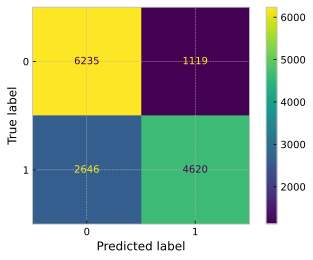

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()


Confusion matrix tells us that our model correctly predicted 6264 no subscribers(0) ,6418 subscribers(1) with x correct prediction in total and we had x incorrect prediction in total.

In [32]:
print("Prediction accuracy={} %".format(round(accuracy_score(y_test, y_pred),2)*100))
LOGCV = (cross_val_score(model, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross Validation={}".format(LOGCV))


Prediction accuracy=74.0 %
Cross Validation=0.743929033842229


#### DecissionTreeClassifier

In [33]:
model_tree= DecisionTreeClassifier()


In [34]:
weights = model_tree.fit(X_train, y_train)
print(type(weights))
y_pred= model_tree.predict(X_test)
print (type(y_pred))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'numpy.ndarray'>


In [35]:
print("Prediction accuracy={} %".format(round(accuracy_score(y_test, y_pred),2)*100))
LOGCV = (cross_val_score(model_tree, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross Validation={}".format(LOGCV))

Prediction accuracy=93.0 %
Cross Validation=0.9266364893708866


In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_tree, X_test, y_test)
plt.show()

In [ ]:
Confusion matrix tells us that our model correctly predicted 6.381 no subscribers(0) ,7183 subscribers(1) with 13.567 correct prediction in total and we had 1053 incorrect prediction in total.

#### GaussianNB

In [37]:
model_gaussian = GaussianNB()


In [38]:
weights = model_gaussian.fit(X_train, y_train)
print(type(weights))
y_pred= model.predict(X_test)
print (type(y_pred))

<class 'sklearn.naive_bayes.GaussianNB'>
<class 'numpy.ndarray'>


In [39]:
print("Prediction accuracy={} %".format(round(accuracy_score(y_test, y_pred),2)*100))
LOGCV = (cross_val_score(model_gaussian, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross Validation={}".format(LOGCV))

Prediction accuracy=74.0 %
Cross Validation=0.6864184182986259


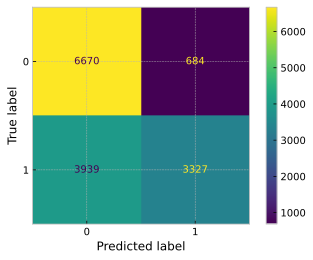

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_gaussian, X_test, y_test)
plt.show()

#### SVC

In [41]:
model_svc = SVC()

In [42]:
weights = model_svc.fit(X_train, y_train)
print(type(weights))
y_pred= model.predict(X_test)
print (type(y_pred))

KeyboardInterrupt: 

In [ ]:
print("Prediction accuracy={} %".format(round(accuracy_score(y_test, y_pred),2)*100))
LOGCV = (cross_val_score(model_svc, X_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
# print("Cross Validation={}".format(LOGCV))_

Prediction accuracy=87.0 %


In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_svc, X_test, y_test)
plt.show()

## Selección de Features

In [83]:
final_data.columns

Index(['age', 'contact', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [86]:
final_data.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.481481,0.0,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
1,0.493827,0.0,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
2,0.246914,0.0,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
3,0.283951,0.0,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0
4,0.481481,0.0,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,1,0,0,0,1,0,0,0,1,0


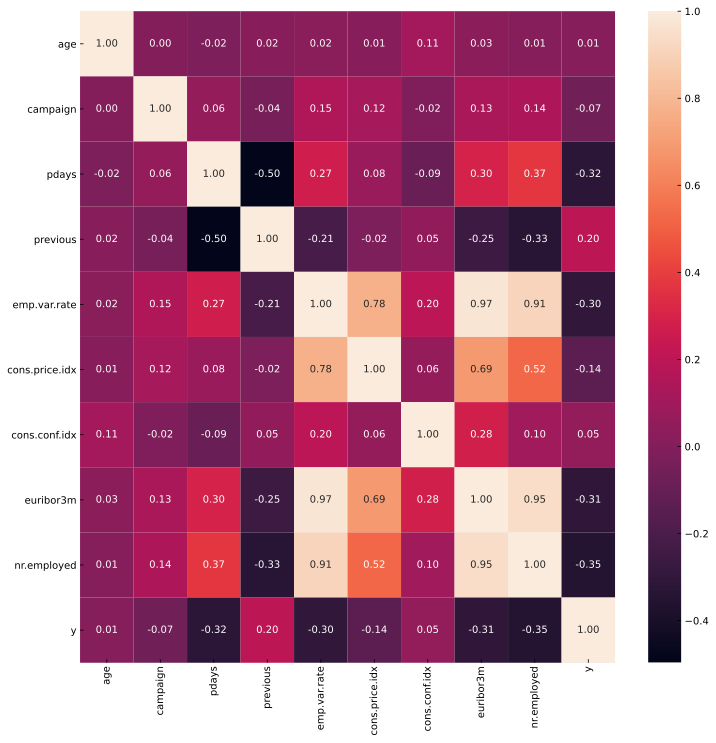

In [64]:
corr= final_data.corr()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)

sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax);

In [86]:
%%time
from sklearn.linear_model import LassoCV
CV_count=3
lasso = LassoCV(cv=CV_count, random_state=1234).fit(X_train, y_train.values.ravel())
coef = np.abs(lasso.coef_)
coef=coef.reshape(1,-1)
df_importance = pd.DataFrame(coef,columns=X.columns)
df_importance

CPU times: user 5.31 s, sys: 250 ms, total: 5.56 s
Wall time: 1.42 s


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.00173,0.008768,0.032735,0.002558,0.363379,0.151541,0.012397,0.09519,0.0,0.0,...,0.0,0.0,0.0,0.021673,0.0,0.0,0.022286,0.068425,0.039447,0.0


Index(['emp.var.rate', 'month_mar', 'cons.price.idx', 'month_may', 'month_nov',
       'contact_cellular', 'month_jun', 'euribor3m', 'poutcome_failure',
       'month_aug'],
      dtype='object')


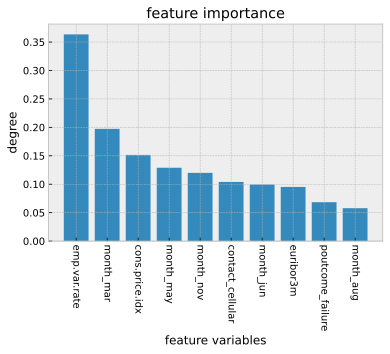

In [87]:
n_top_features = 10
df_importance_top = df_importance.median().sort_values(ascending=False)[:n_top_features]
name_features = df_importance_top.index
left = name_features
height = df_importance_top.values
plt.bar(left, height,align="center",linewidth=1)
plt.xticks(rotation=270)
plt.title("feature importance")
plt.xlabel("feature variables")
plt.ylabel("degree")
plt.grid(True)
print(name_features)

In [102]:
X_train_10 = pd.DataFrame(scaler.fit_transform(X_train[name_features]),
                              columns=X_train[name_features].columns)
X_test_10 = pd.DataFrame(scaler.transform(X_test[name_features]),
                             columns=X_test[name_features].columns)

In [103]:
X_train_10.shape, X_test_10.shape

((58476, 10), (14620, 10))